<a href="https://colab.research.google.com/github/chi-hun/chi-hun/blob/main/albumentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
image = cv2.imread('/content/gettyimages-1251667609-580x418.jpg')

In [14]:
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

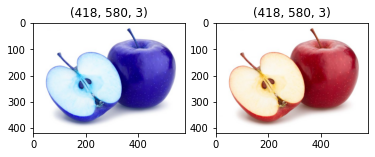

In [16]:
plt.subplot(1,2,1)
plt.imshow(image)
plt.title(image.shape)
plt.subplot(1,2,2)
plt.imshow(image2)
plt.title(image2.shape)
plt.show()

In [17]:
image_o = image2

In [61]:
np.random.randint(0,256,[3,3])

array([[138, 124, 250],
       [ 59,  96,  35],
       [ 10, 151, 140]])

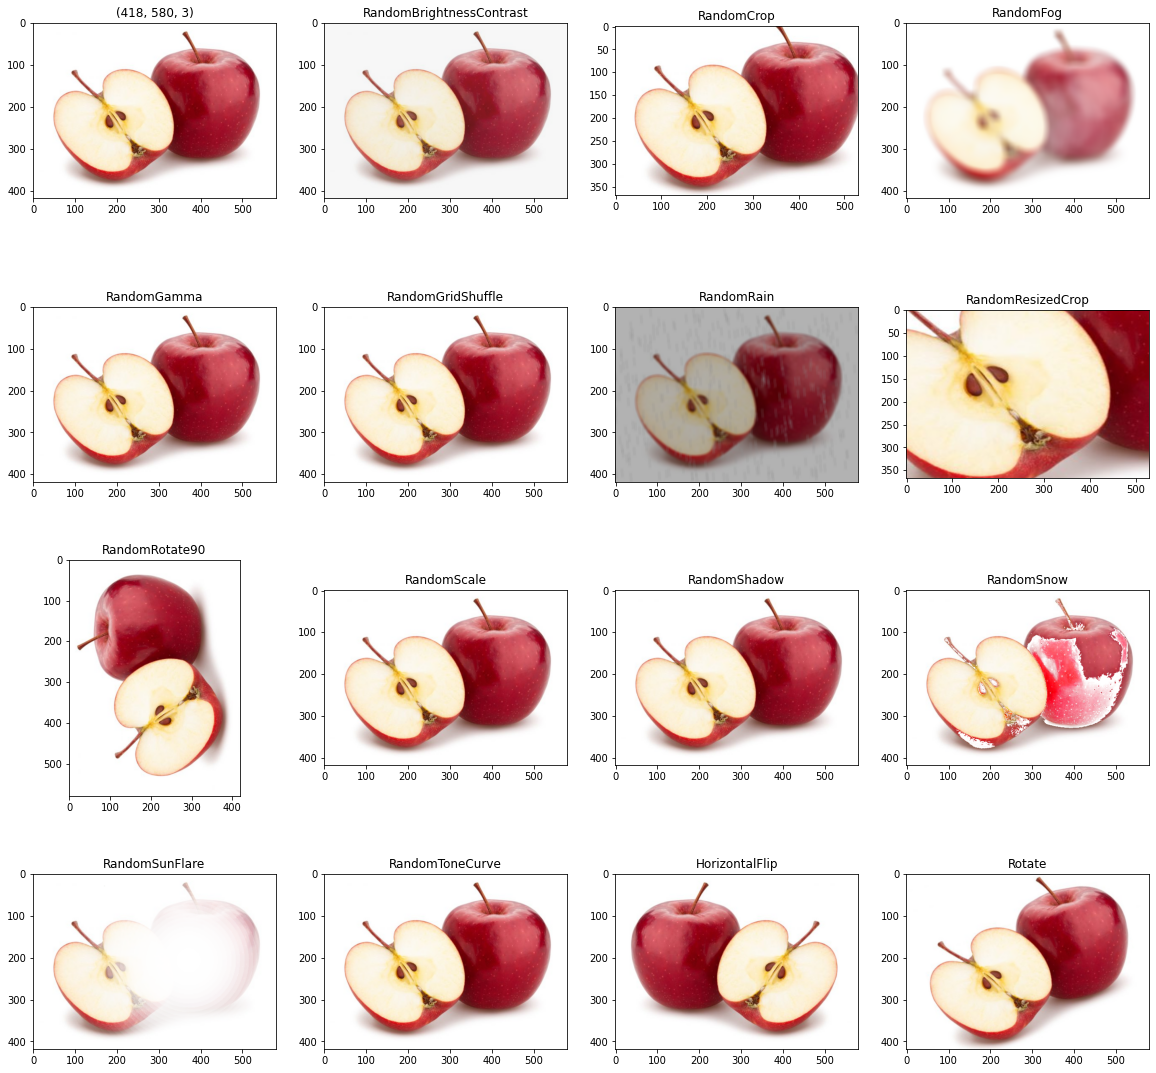

In [83]:
transformer = A.Compose([A.RandomBrightnessContrast(),
                         A.RandomCrop(image.shape[0]-50,image.shape[1]-50),
                         A.RandomFog(True),
                         A.RandomGamma(),
                         A.RandomGridShuffle(),
                         A.RandomRain(True),
                         A.RandomResizedCrop(image.shape[0]-50,image.shape[1]-50),
                         A.RandomRotate90(True),
                         A.RandomScale(),
                         A.RandomShadow(),
                         A.RandomSnow(),
                         A.RandomSunFlare(),
                         A.RandomToneCurve(),
                         A.HorizontalFlip(True),
                         A.Rotate(20)])
plt.figure(figsize=(20,20))
for i in range(16):
    if i == 0:
        plt.subplot(4,4,i+1)
        plt.imshow(image_o)
        plt.title(image_o.shape)
    else:
        plt.subplot(4,4,i+1)
        plt.imshow(transformer[i-1](image=image_o)['image'])
        plt.title(transformer[i-1].__class__.__name__)
plt.show()